In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np

In [2]:
device ='cuda' if torch.cuda.is_available() else 'mps' if torch.backends.mps.is_available() else 'cpu'


### Import the dataset from sklearn

In [3]:
import sklearn
from sklearn.datasets import make_circles

In [4]:
n_samples = 1000

X, y = make_circles(n_samples, noise=0.03, random_state=42)



In [5]:
print(f"First 10 samples: {X[:10]}")
print(f"First 10 labels: {y[:10]}")

First 10 samples: [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]
 [-0.47964637  0.67643477]
 [-0.01364836  0.80334872]
 [ 0.77151327  0.14775959]
 [-0.16932234 -0.79345575]
 [-0.1214858   1.02150905]]
First 10 labels: [1 1 1 1 0 1 1 1 1 0]


In [61]:
import pandas as pd
import matplotlib.pyplot as plt
circles=pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))

TypeError: can't convert mps:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

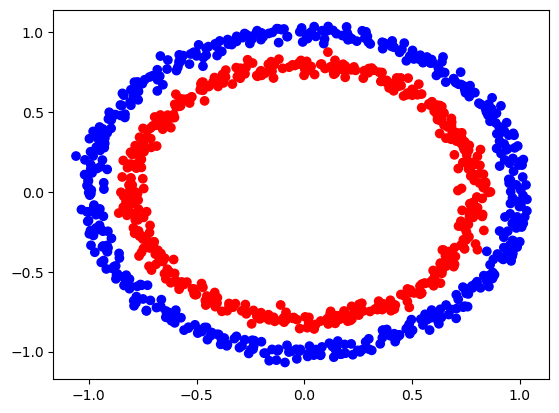

In [ ]:
plt.scatter(circles.x, circles.y, c=circles.label, cmap='bwr')

In [ ]:
X=torch.from_numpy(X).float().to(device)
y=torch.from_numpy(y).float().to(device) 


In [ ]:
X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]], device='mps:0'),
 tensor([1., 1., 1., 1., 0.], device='mps:0'))

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_test=y_test.view(-1,1)
y_train=y_train.view(-1,1)


In [62]:
# Build a model that subclasses the nn.Module class

class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Linear(2, 64)
        self.output = nn.Linear(64, 1)
        
    def forward(self, x):
        x = F.relu(self.hidden(x))
        x = torch.sigmoid(self.output(x))
        return x
    
    
## Build a model that subclasses the nn.Module class using nn.Sequential

class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 64),
            nn.ReLU(),
            nn.Linear(64, 1),
            nn.Sigmoid()
        )
        
    def forward(self, x):
        return self.model(x)

In [63]:
model_0 = CircleModelV1().to(device)
loss=nn.BCELoss()
optimizer=optim.AdamW(model_0.parameters(), lr=0.1)


In [65]:
for _ in range(1000):
    optimizer.zero_grad()
    y_pred = model_0(X_train)
    y_pred = y_pred
    l = loss(y_pred, y_train)
    l.backward()
    optimizer.step()
    print(l.item())

0.694402813911438
1.3408046960830688
0.7972344756126404
0.8200507760047913
0.8024140000343323
0.636412501335144
0.6258840560913086
0.5912677645683289
0.5605389475822449
0.5610536932945251
0.49689558148384094
0.4911671280860901
0.47649601101875305
0.4204065501689911
0.4236788749694824
0.37716925144195557
0.3484498858451843
0.32318979501724243
0.2762335538864136
0.27068275213241577
0.23822550475597382
0.2084944248199463
0.2017340362071991
0.1765630692243576
0.15899398922920227
0.1544327437877655
0.14192333817481995
0.12000153958797455
0.11666753143072128
0.1056610569357872
0.093388631939888
0.08700954169034958
0.08180638402700424
0.07214391231536865
0.0646643415093422
0.058521904051303864
0.05518306791782379
0.04816283658146858
0.04416654631495476
0.042167890816926956
0.03744565695524216
0.03338925912976265
0.031028231605887413
0.028742918744683266
0.02684982307255268
0.02436024881899357
0.02240520343184471
0.021709466353058815
0.020755121484398842
0.01926909014582634
0.01807429455220699

In [33]:
model_0.eval()
y_pred=model_0(X_test)
y_pred[:5]
y_test[:5]

# Calculate the accuracy of the model
((y_pred>0.5)==y_test).sum().item()/y_test.shape[0]

1.0

ValueError: x and y must be the same size

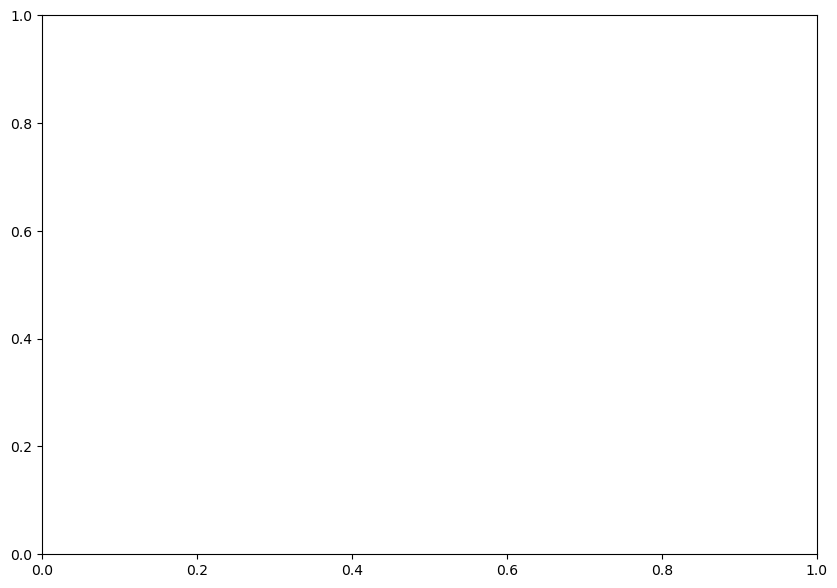